<a href="https://colab.research.google.com/github/sandy0507/sandy0507-Capstone_Project-_1/blob/main/1_IPL_T20_Cricket_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

# Data Exploring:

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing all required Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Creating Delivery DateFrame:
delivery_df=pd.read_csv('/content/drive/MyDrive/ALmaBetter/Capstone Projects/EDA on IPL T20 Cricket Analysis/Data/deliveries.csv')
delivery_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
delivery_df.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [ ]:
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [ ]:
delivery_df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [ ]:
# Creating Matches DataFrame:
matches_df=pd.read_csv('/content/drive/MyDrive/ALmaBetter/Capstone Projects/EDA on IPL T20 Cricket Analysis/Data/matches.csv')
matches_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [ ]:
# Merging Two dataframes "Delivery" & "Matches":
merge_df=pd.merge(matches_df,delivery_df,left_on='id',right_on='match_id')
merge_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
merge_df.tail()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [ ]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 0 to 179077
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                179078 non-null  int64 
 1   Season            179078 non-null  object
 2   city              177378 non-null  object
 3   date              179078 non-null  object
 4   team1             179078 non-null  object
 5   team2             179078 non-null  object
 6   toss_winner       179078 non-null  object
 7   toss_decision     179078 non-null  object
 8   result            179078 non-null  object
 9   dl_applied        179078 non-null  int64 
 10  winner            178706 non-null  object
 11  win_by_runs       179078 non-null  int64 
 12  win_by_wickets    179078 non-null  int64 
 13  player_of_match   178706 non-null  object
 14  venue             179078 non-null  object
 15  umpire1           178578 non-null  object
 16  umpire2           178578 non-null  obj

In [ ]:
merge_df.describe()

,id,dl_applied,win_by_runs,win_by_wickets,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,0.017914,13.404036,3.261579,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.132639,23.261007,3.347033,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,0.000000,0.000000,0.000000,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,0.000000,0.000000,3.000000,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,0.000000,19.000000,6.000000,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,1.000000,146.000000,10.000000,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [ ]:
matches_df.venue.value_counts()

Eden Gardens                                            77
M Chinnaswamy Stadium                                   73
Wankhede Stadium                                        73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Brabourne Stadium                                       11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     

#1.	Highest sum of score by team's in each season



In [ ]:
merge_df.head(2)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [ ]:
merge_df.tail(2)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179076,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [ ]:
merge_df.describe()

,id,dl_applied,win_by_runs,win_by_wickets,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,0.017914,13.404036,3.261579,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.132639,23.261007,3.347033,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,0.000000,0.000000,0.000000,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,0.000000,0.000000,3.000000,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,0.000000,19.000000,6.000000,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,1.000000,146.000000,10.000000,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [ ]:
type(merge_df)


pandas.core.frame.DataFrame

In [ ]:
merge_df.shape

(179078, 39)

In [ ]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 0 to 179077
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                179078 non-null  int64 
 1   Season            179078 non-null  object
 2   city              177378 non-null  object
 3   date              179078 non-null  object
 4   team1             179078 non-null  object
 5   team2             179078 non-null  object
 6   toss_winner       179078 non-null  object
 7   toss_decision     179078 non-null  object
 8   result            179078 non-null  object
 9   dl_applied        179078 non-null  int64 
 10  winner            178706 non-null  object
 11  win_by_runs       179078 non-null  int64 
 12  win_by_wickets    179078 non-null  int64 
 13  player_of_match   178706 non-null  object
 14  venue             179078 non-null  object
 15  umpire1           178578 non-null  object
 16  umpire2           178578 non-null  obj

In [ ]:
# Batting runs of team in each season: 
team_runs_in_each_season=merge_df.groupby(['Season', 'batting_team'],as_index=False).agg({'batsman_runs': "sum"}).sort_values(by='Season')
team_runs_in_each_season

,Season,batting_team,batsman_runs
0,IPL-2008,Chennai Super Kings,2365
1,IPL-2008,Deccan Chargers,2117
2,IPL-2008,Delhi Daredevils,2000
3,IPL-2008,Kings XI Punjab,2340
4,IPL-2008,Kolkata Knight Riders,1801
...,...,...,...
94,IPL-2019,Kings XI Punjab,2431
95,IPL-2019,Kolkata Knight Riders,2476
96,IPL-2019,Mumbai Indians,2676
97,IPL-2019,Rajasthan Royals,2195


In [ ]:
team_runs_in_each_season.describe()

,batsman_runs
count,100.000000
mean,2232.860000
std,288.251014
min,1601.000000
25%,2042.000000
50%,2209.500000
75%,2425.750000
max,2863.000000


In [ ]:
team_runs_in_each_season.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Season        100 non-null    object
 1   batting_team  100 non-null    object
 2   batsman_runs  100 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.1+ KB


In [ ]:
x=list(team_runs_in_each_season['Season'].unique())
x

['IPL-2008',
 'IPL-2009',
 'IPL-2010',
 'IPL-2011',
 'IPL-2012',
 'IPL-2013',
 'IPL-2014',
 'IPL-2015',
 'IPL-2016',
 'IPL-2017',
 'IPL-2018',
 'IPL-2019']

In [ ]:
# Checking runs for all teams in first season: 
season1_runs=team_runs_in_each_season[team_runs_in_each_season['Season']=='IPL-2012'].sort_values(by='batsman_runs',ascending=False)
season1_runs

,Season,batting_team,batsman_runs
34,IPL-2012,Chennai Super Kings,2716
36,IPL-2012,Delhi Daredevils,2502
41,IPL-2012,Rajasthan Royals,2393
38,IPL-2012,Kolkata Knight Riders,2356
42,IPL-2012,Royal Challengers Bangalore,2351
39,IPL-2012,Mumbai Indians,2333
37,IPL-2012,Kings XI Punjab,2286
35,IPL-2012,Deccan Chargers,2202
40,IPL-2012,Pune Warriors,2183


In [ ]:
#Fetching season max runs:
team_runs=[]

for i in x:
  season1=team_runs_in_each_season[team_runs_in_each_season['Season']==i]
  team_runs.append(season1['batsman_runs'].max())

team_runs
 

[2424, 2283, 2553, 2461, 2716, 2845, 2824, 2611, 2863, 2633, 2809, 2676]

In [ ]:
# Checking team with max run:
sea=team_runs_in_each_season[team_runs_in_each_season['batsman_runs']==2424]
sea['batting_team'].unique()



array(['Rajasthan Royals'], dtype=object)

In [ ]:
# Fetching team name with max runs in season:
team_name=[]
for i in team_runs:
  name=team_runs_in_each_season[team_runs_in_each_season['batsman_runs']==i]
  team_name.append(name['batting_team'].unique())

print(team_name)

[array(['Rajasthan Royals'], dtype=object), array(['Deccan Chargers'], dtype=object), array(['Mumbai Indians'], dtype=object), array(['Chennai Super Kings', 'Sunrisers Hyderabad'], dtype=object), array(['Chennai Super Kings'], dtype=object), array(['Mumbai Indians'], dtype=object), array(['Kings XI Punjab'], dtype=object), array(['Mumbai Indians'], dtype=object), array(['Royal Challengers Bangalore'], dtype=object), array(['Mumbai Indians'], dtype=object), array(['Chennai Super Kings'], dtype=object), array(['Mumbai Indians'], dtype=object)]


In [ ]:
#Creating DataFrame for each season with max runs team:
max_runs_by_team=pd.DataFrame({'season':x,
                               'teams_with_max_runs_in_season':team_name,
                               'max_runs_in_season':team_runs
                               
})
max_runs_by_team

,season,teams_with_max_runs_in_season,max_runs_in_season
0,IPL-2008,[Rajasthan Royals],2424
1,IPL-2009,[Deccan Chargers],2283
2,IPL-2010,[Mumbai Indians],2553
3,IPL-2011,"[Chennai Super Kings, Sunrisers Hyderabad]",2461
4,IPL-2012,[Chennai Super Kings],2716
5,IPL-2013,[Mumbai Indians],2845
6,IPL-2014,[Kings XI Punjab],2824
7,IPL-2015,[Mumbai Indians],2611
8,IPL-2016,[Royal Challengers Bangalore],2863
9,IPL-2017,[Mumbai Indians],2633


In [ ]:
a=list(max_runs_by_team['max_runs_in_season'])
b=list(max_runs_by_team['teams_with_max_runs_in_season'])
a
b

[array(['Rajasthan Royals'], dtype=object),
 array(['Deccan Chargers'], dtype=object),
 array(['Mumbai Indians'], dtype=object),
 array(['Chennai Super Kings', 'Sunrisers Hyderabad'], dtype=object),
 array(['Chennai Super Kings'], dtype=object),
 array(['Mumbai Indians'], dtype=object),
 array(['Kings XI Punjab'], dtype=object),
 array(['Mumbai Indians'], dtype=object),
 array(['Royal Challengers Bangalore'], dtype=object),
 array(['Mumbai Indians'], dtype=object),
 array(['Chennai Super Kings'], dtype=object),
 array(['Mumbai Indians'], dtype=object)]

In [ ]:
sns.barplot(x="teams_with_max_runs_in_season", y="max_runs_in_season",palette="inferno").set_title("Top 10 Bowlers of IPL",fontdict = { 'fontsize': 20})

sns.set_style('darkgrid')

ValueError: ignored

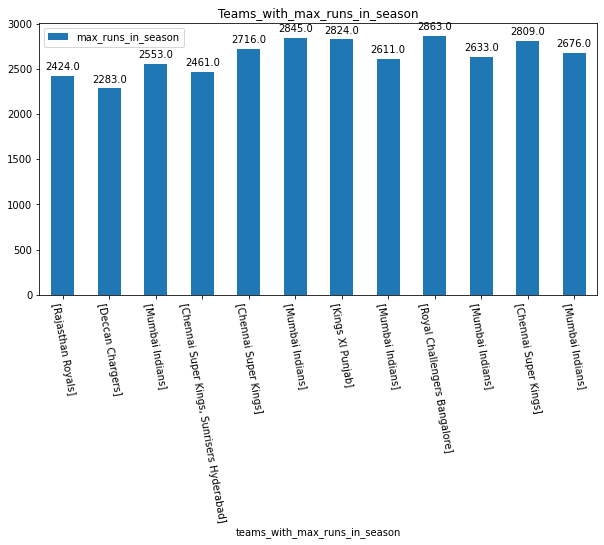

In [ ]:
#Visuilizating the objective:
splot=max_runs_by_team.plot.bar( x="teams_with_max_runs_in_season", y="max_runs_in_season", rot=1000,title="Teams_with_max_runs_in_season",figsize =(10,5),fontsize= 10)
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',fontsize=10)


#2.	Is scoring runs in season is easy over the years?

In [ ]:
# Total runs score in each season

season_runs=merge_df.groupby('Season')['batsman_runs'].sum()

max_season_runs=pd.DataFrame(season_runs)
max_season_runs


,batsman_runs
Season,
IPL-2008,16809
IPL-2009,15376
IPL-2010,17754
IPL-2011,19928
IPL-2012,21322
IPL-2013,21487
IPL-2014,17943
IPL-2015,17427
IPL-2016,17963


In [ ]:
#Rename 'batsman_runs' to 'Total_runs':
max_season_runs.rename(columns={'batsman_runs':'Total_runs'})

,Total_runs
Season,
IPL-2008,16809
IPL-2009,15376
IPL-2010,17754
IPL-2011,19928
IPL-2012,21322
IPL-2013,21487
IPL-2014,17943
IPL-2015,17427
IPL-2016,17963


In [ ]:
max_season_runs.describe()

,batsman_runs
count,12.000000
mean,18607.166667
std,1832.290610
min,15376.000000
25%,17672.250000
50%,17953.000000
75%,19911.500000
max,21487.000000


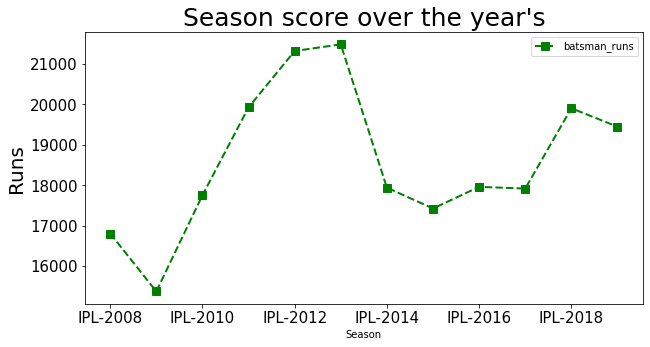

In [ ]:
# Plot each season runs in bar type:
max_season_runs.plot(color='green', marker='s', linestyle='dashed',figsize =(10,5),linewidth=2,markersize=8,fontsize=15) 
plt.title("Season score over the year's",size=25)
plt.ylabel('Runs',fontsize=20)
plt.rcParams['figure.figsize'] = (50, 10) 

In [ ]:
matches_df[matches_df['Season']=='IPL-2013'].count()

id                 76
Season             76
city               76
date               76
team1              76
team2              76
toss_winner        76
toss_decision      76
result             76
dl_applied         76
winner             76
win_by_runs        76
win_by_wickets     76
player_of_match    76
venue              76
umpire1            76
umpire2            76
umpire3             0
dtype: int64

In [ ]:
matches_df[matches_df['Season']=='IPL-2014'].count()

id                 60
Season             60
city               53
date               60
team1              60
team2              60
toss_winner        60
toss_decision      60
result             60
dl_applied         60
winner             60
win_by_runs        60
win_by_wickets     60
player_of_match    60
venue              60
umpire1            60
umpire2            60
umpire3             0
dtype: int64